In [327]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

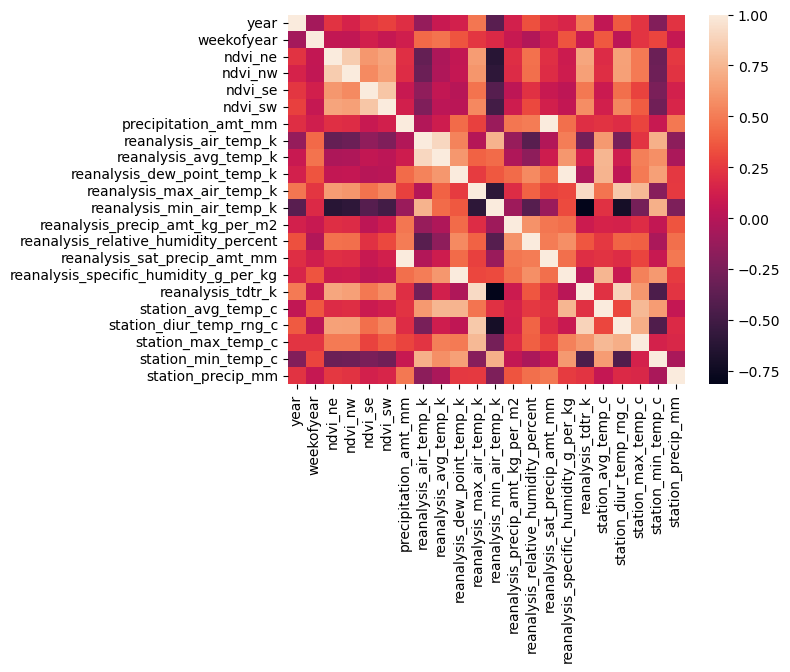

(416, 24)

In [328]:
y_train = pd.read_csv('./data/dengue_labels_train.csv')
X_train = pd.read_csv('./data/dengue_features_train.csv')
X_test = pd.read_csv('./data/dengue_features_test.csv')
X_train.describe().T

#X_train.isna().any()
#X_train.head()

X_train.isnull().sum()
X_train.info()

X_train.city.unique()

corr = X_train.corr()

sns.heatmap(corr)
plt.show()
X_test.shape



In [329]:
y_train.head()

df = pd.concat([y_train.total_cases, X_train], axis=1)
df.head()

,total_cases,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,4,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,5,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,4,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,6,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [330]:
# data cleaning

df = df.drop_duplicates()
df.city[df.city == 'sj'] = 0
df.city[df.city == 'iq'] = 1
df['Month'] = pd.DatetimeIndex(df['week_start_date']).month
df = df.drop(columns=['year', 'weekofyear', 'week_start_date', 'city'])
for i in df.columns:
    df[i].fillna(df.groupby('Month')[i].transform('median'), inplace=True)
#df = df.dropna()

/tmp/ipykernel_47530/524889588.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.city[df.city == 'sj'] = 0
/tmp/ipykernel_47530/524889588.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.city[df.city == 'iq'] = 1


In [331]:
df.tail()

,total_cases,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Month
1451,5,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,8,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,6
1453,1,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,6
1454,1,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,6
1455,4,0.298186,0.232971,0.274214,0.315757,63.22,298.097143,299.835714,295.807143,307.8,...,89.082857,63.22,17.355714,11.014286,27.475000,9.900000,33.7,22.2,20.4,6


In [332]:
# building a dirty XGBoost model

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression # as a baseline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, SCORERS



y = df['total_cases']
X = df.drop(labels=['total_cases'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

#Baseline LinearRegression
pipe_lr = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_xgb = Pipeline([('scaler', StandardScaler()), ('lr', XGBRegressor())])

# Fitting and predicting with Linear Regression ('Baseline')
pipe_lr.fit(X_train, y_train)
lr_predict = pipe_lr.predict(X_val)

# Fitting and predicting with XGBoost
pipe_xgb.fit(X_train, y_train)
xgb_predict = pipe_xgb.predict(X_val)

rmse_lr = mean_absolute_error(y_val, lr_predict)
print(f'MAE (Baseline): {rmse_lr}')

rmse_xgb = mean_absolute_error(y_val, xgb_predict)
print(f'MAE (XGBoost): {rmse_xgb}')

MAE (Baseline): 22.716427141841926
MAE (XGBoost): 18.107292666423316


In [333]:
df = X_test

# data cleaning

df = df.drop_duplicates()
df.city[df.city == 'sj'] = 0
df.city[df.city == 'iq'] = 1
df['Month'] = pd.DatetimeIndex(df['week_start_date']).month
df = df.drop(columns=['year', 'weekofyear', 'week_start_date', 'city'])
for i in df.columns:
    df[i].fillna(df.groupby('Month')[i].transform('median'), inplace=True)

#df = df.dropna()


pipe_lr.fit(X, y)
lr_predict = pipe_lr.predict(df)






/tmp/ipykernel_47530/3386177199.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.city[df.city == 'sj'] = 0
/tmp/ipykernel_47530/3386177199.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.city[df.city == 'iq'] = 1


In [344]:
subm = pd.read_csv('./submission_format.csv')

labels = pd.DataFrame({'total_cases': pd.Series(lr_predict)})
subm.loc[:, 'total_cases'] = labels.astype(int)

#subm.reset_index(index=False)
#export to csv file

subm.to_csv('submission_230202.csv', index=False)
subm

,city,year,weekofyear,total_cases
0,sj,2008,18,28
1,sj,2008,19,24
2,sj,2008,20,27
3,sj,2008,21,30
4,sj,2008,22,35
...,...,...,...,...
411,iq,2013,22,3
412,iq,2013,23,3
413,iq,2013,24,5
414,iq,2013,25,0


In [1]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator

class CustomStuff(BaseEstimator):

    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, x, y):
        return self

    def transform(self, x):
        return x.drop(columns=self.columns_to_drop)


pipe = make_pipeline(
    CustomStuff(columns_to_drop=["city", "week_start_date"]),
    StandardScaler(),
    KNNImputer(),
    RandomForestRegressor(),
)

pipe.fit(X_train, y_train.loc[:, "total_cases"])
pipe.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
# hyperopt


from hyperopt import fmin, tpe, hp
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
# hyperopt XGBoostRegressor

from hyperopt import fmin, tpe, hp
from sklearn.model_selection import cross_val_score

# Define the hyperparameter space
space = {
    'n_estimators': hp.quniform('n_estimators', 5, 15, 1),
    'max_depth': hp.quniform('max_depth', 1, 10, 1),
    'criterion': hp.choice('criterion', ['mse']),
    'learning_rate': hp.quniform('learning_rate', 0, 1, .05)
}

# Define the objective function
def objective(params):
    reg = XGBRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
    )
    score = cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error').mean()
    return score

# Run the optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=10, verbose=1)

# Train the best model on the entire dataset
best_reg = XGBRegressor(
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    criterion='squared_error',
    learning_rate=best['learning_rate']
)

pipe_xgb_opt = Pipeline([('scaler', StandardScaler()), ('rf', best_reg)])

pipe_xgb_opt.fit(X_train, y_train)
xgb_predict_opt = pipe_xgb_opt.predict(X_val)

MAE_xgb_opt = mean_absolute_error(y_val, xgb_predict_opt)
print(f'MAE (xgb_opt): {MAE_xgb_opt}')

print(f'the best rf-model has the following parameters: \n{best}')

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and wil

 10%|█         | 1/10 [00:00<00:03,  2.74trial/s, best loss: -15.530002771551192]

/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and wil

 20%|██        | 2/10 [00:01<00:04,  1.83trial/s, best loss: -16.98612457895802] 

/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and wil

 30%|███       | 3/10 [00:01<00:03,  1.79trial/s, best loss: -16.98612457895802]

/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and wil

 40%|████      | 4/10 [00:01<00:02,  2.29trial/s, best loss: -16.98612457895802]

/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and wil

 50%|█████     | 5/10 [00:02<00:02,  2.23trial/s, best loss: -16.98612457895802]

/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and wil

 60%|██████    | 6/10 [00:02<00:01,  2.42trial/s, best loss: -16.98612457895802]

/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and wil

 70%|███████   | 7/10 [00:03<00:01,  2.04trial/s, best loss: -16.98612457895802]

/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and wil

 80%|████████  | 8/10 [00:03<00:00,  2.24trial/s, best loss: -16.98612457895802]

/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and wil

 90%|█████████ | 9/10 [00:03<00:00,  2.50trial/s, best loss: -16.98612457895802]

/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/andreas/anaconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and wil

100%|██████████| 10/10 [00:04<00:00,  2.23trial/s, best loss: -16.98612457895802]
[16:41:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:576: 
Parameters: { "criterion" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


MAE (xgb_opt): 20.004924221397047
the best rf-model has the following parameters: 
{'criterion': 0, 'learning_rate': 0.7000000000000001, 'max_depth': 7.0, 'n_estimators': 11.0}
